# Combining dataframes and scraping Canadian weather data

## Install

In [1]:
SYFT_VERSION = ">=0.8.1b0,<0.9"
package_string = f'"syft{SYFT_VERSION}"'
# !pip install {package_string} -f https://whls.blob.core.windows.net/unstable/index.html -q

In [2]:
import syft as sy
sy.requires(SYFT_VERSION)

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /Users/koen/workspace/PySyft


✅ The installed version of syft==0.8.1b2 matches the requirement >=0.8.1b0 and the requirement <0.9


In [5]:
node = sy.orchestra.launch(name="pandas-test-domain-5", reset=True)

SQLite Store Path:
!open file:///var/folders/q1/ryq93kwj055dlbpngxv1c7z40000gn/T/76a4d7cc6736f7aea62bfbfef0469953.sqlite



# Data owner: upload dataset

In [6]:
root_domain_client = node.login(email="info@openmined.org", password="changethis")

## Load data

By the end of this chapter, we're going to have downloaded all of Canada's weather data for 2012, and saved it to a CSV.

We'll do this by downloading it one month at a time, and then combining all the months together.

Here's the temperature every hour for 2012!

In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

In [8]:
from datetime import timedelta
import random
from dateutil.parser import parse
from pandas._libs.tslibs.timestamps import Timestamp
from syft.service.project.project import Project
from syft.util.util import autocache, PANDAS_DATA

<AxesSubplot: xlabel='Date/Time'>

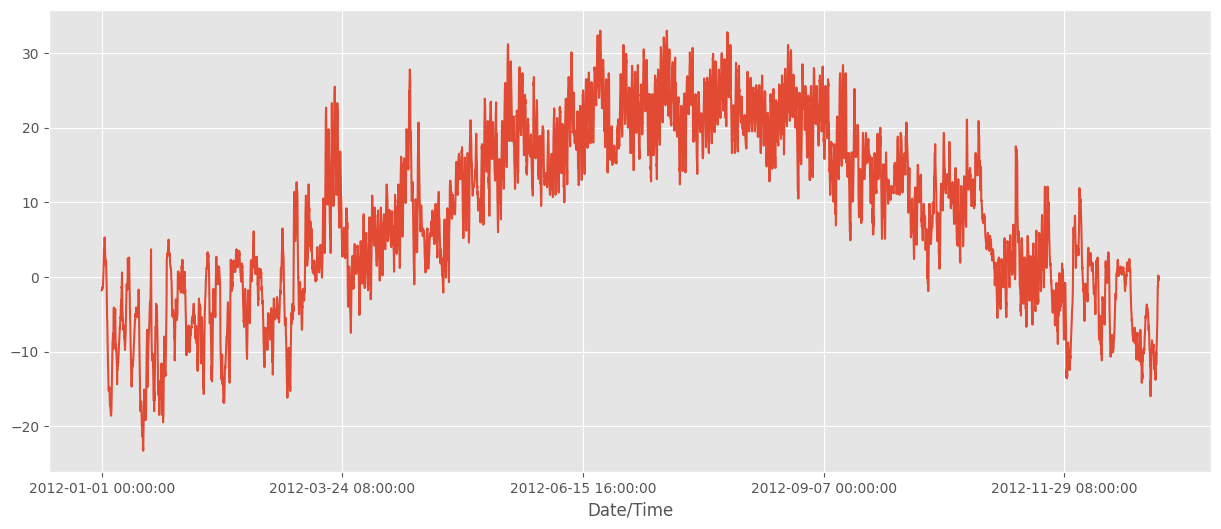

In [9]:
weather_2012_final = pd.read_csv(autocache(f"{PANDAS_DATA}/weather_2012.csv"), index_col='Date/Time')
weather_2012_final['Temp (C)'].plot(figsize=(15, 6))

## Create mock data

Instead, we upload our dataset per month as a starting point

In [10]:
url_template = "http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1&submit"

In [11]:
weather_types = set(weather_2012_final.Weather.to_list())

In [12]:
def get_mock_date(i):
    return str(parse('Jun 1 2010') + timedelta(days=i))

def get_mock_row(i):
    res = dict()
    for k, function in mock_functions.items():
        res[k] = function()
    return res
    

In [13]:
mock_functions = {
    "Temp (°C)": lambda: random.uniform(-10, 40),
    "Dew Point Temp (C)": lambda: random.uniform(-10, 10),
    "Rel Hum (%)": lambda: random.randint(50, 100),
    "Wind Spd (km/h)": lambda: random.randint(1, 30),
    'Visibility (km)': lambda: random.uniform(0.5, 40),
    'Stn Press (kPa)': lambda: random.uniform(50, 100),
    'Weather': lambda: random.choice(list(weather_types))
}

In [14]:
assets = []
for month in range(1, 13):
    url = url_template.format(month=month, year=2012)
    weather = pd.read_csv(url, parse_dates=True, index_col='Date/Time (LST)')
    mock = pd.DataFrame(index=[Timestamp(get_mock_date(i)) for i in range(len(weather))],
                    data=[get_mock_row(i) for i in range(len(weather))],
                    columns=weather.columns)
    
    assets += [sy.Asset(name=f"weather{month}", data=weather, mock=mock, mock_is_real=False)]

Upload the data

In [15]:
dataset = sy.Dataset(name="test", asset_list=assets)
root_domain_client.upload_dataset(dataset)

  8%|████████▋                                                                                               | 1/12 [00:00<00:01,  7.86it/s]

Uploading: weather1
Uploading: weather2
Uploading: weather3


 42%|███████████████████████████████████████████▎                                                            | 5/12 [00:00<00:00, 14.56it/s]

Uploading: weather4
Uploading: weather5
Uploading: weather6
Uploading: weather7


 75%|██████████████████████████████████████████████████████████████████████████████                          | 9/12 [00:00<00:00, 15.47it/s]

Uploading: weather8
Uploading: weather9
Uploading: weather10
Uploading: weather11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 15.04it/s]


Uploading: weather12


<class 'syft.service.response.SyftSuccess'>: Dataset Added

In [16]:
weather.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time (LST),Temp (°C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time (LST),,,,,,,,,,,,,,,,,,,,,
2012-12-01 00:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,12,1,00:00,-10.8,NaN,...,NaN,25.0,NaN,103.26,NaN,NaN,NaN,-16.0,NaN,Clear
2012-12-01 01:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,12,1,01:00,-11.0,NaN,...,NaN,25.0,NaN,103.25,NaN,NaN,NaN,-17.0,NaN,Mainly Clear
2012-12-01 02:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,12,1,02:00,-11.1,NaN,...,NaN,25.0,NaN,103.21,NaN,NaN,NaN,-19.0,NaN,Mainly Clear
2012-12-01 03:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,12,1,03:00,-12.5,NaN,...,NaN,25.0,NaN,103.27,NaN,NaN,NaN,-20.0,NaN,Mainly Clear
2012-12-01 04:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,12,1,04:00,-11.8,NaN,...,NaN,25.0,NaN,103.22,NaN,NaN,NaN,-19.0,NaN,Mostly Cloudy


## Create user account

In [17]:
user = root_domain_client.register(name="Jane Doe", email="jane@caltech.edu",
                            password="abc123", institution="Caltech", website="https://www.caltech.edu/")

# todo: give user data scientist role

guest_domain_client = node.client

guest_client = guest_domain_client.login(email="jane@caltech.edu", password="abc123")

# Data scientist: result pointers

In [18]:
import numpy as np
import pandas as pd

## Summary
By the end of this chapter, we're going to have downloaded all of Canada's weather data for 2012, and saved it to a CSV.

We'll do this by downloading it one month at a time, and then combining all the months together.

## Get mocks

In [19]:
ds = guest_domain_client.datasets[-1]

In [20]:
ds.assets

,key,type,id
0,weather1,syft.service.dataset.dataset.Asset,34b28ec478da4f1f8623679f13cf9a6e
1,weather2,syft.service.dataset.dataset.Asset,fcb78ac76f3741b0b2aee77757c31083
2,weather3,syft.service.dataset.dataset.Asset,cb74929398b1424ba17a51710c01ae88
3,weather4,syft.service.dataset.dataset.Asset,1e750090621a4f90bb3dcc07f77fc819
4,weather5,syft.service.dataset.dataset.Asset,593dcefcc4e84f32a3882eb68d7600d3


## Downloading one month of weather data

When playing with the cycling data, I wanted temperature and precipitation data to find out if people like biking when it's raining. So I went to the site for Canadian historical weather data, and figured out how to get it automatically.

Here we're going to get the data for March 2012, and clean it up

In [21]:
url_template = "weather{month}"

To get the data for March 2013, we need to format it with `month=3`, `year=2012.`


In [22]:
url = url_template.format(month=3, year=2012)

In [23]:
asset = ds.assets[url]
weather_mar2012 = asset.mock

This is super great! We can just use the this mock directly, and just give it a URL as a filename. Awesome.
Here's the resulting dataframe.

In [24]:
weather_mar2012

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time (LST),Temp (°C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
2010-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.006468,NaN,...,NaN,36.767367,NaN,73.822915,NaN,NaN,NaN,NaN,NaN,"Moderate Snow,Blowing Snow"
2010-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.029559,NaN,...,NaN,26.470054,NaN,95.112604,NaN,NaN,NaN,NaN,NaN,"Snow,Ice Pellets"
2010-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.433323,NaN,...,NaN,11.292350,NaN,72.188617,NaN,NaN,NaN,NaN,NaN,"Freezing Drizzle,Haze"
2010-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.442150,NaN,...,NaN,30.377129,NaN,72.505070,NaN,NaN,NaN,NaN,NaN,"Thunderstorms,Heavy Rain Showers"
2010-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.235777,NaN,...,NaN,4.615873,NaN,93.213281,NaN,NaN,NaN,NaN,NaN,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-06-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.064813,NaN,...,NaN,9.952335,NaN,84.889414,NaN,NaN,NaN,NaN,NaN,"Rain Showers,Fog"
2012-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.391321,NaN,...,NaN,12.618441,NaN,68.099718,NaN,NaN,NaN,NaN,NaN,"Snow,Haze"
2012-06-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.606456,NaN,...,NaN,32.434483,NaN,90.864558,NaN,NaN,NaN,NaN,NaN,Snow Showers
2012-06-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.244383,NaN,...,NaN,26.520827,NaN,52.488381,NaN,NaN,NaN,NaN,NaN,"Drizzle,Snow,Fog"


```python
Pointer
```
<AxesSubplot: >

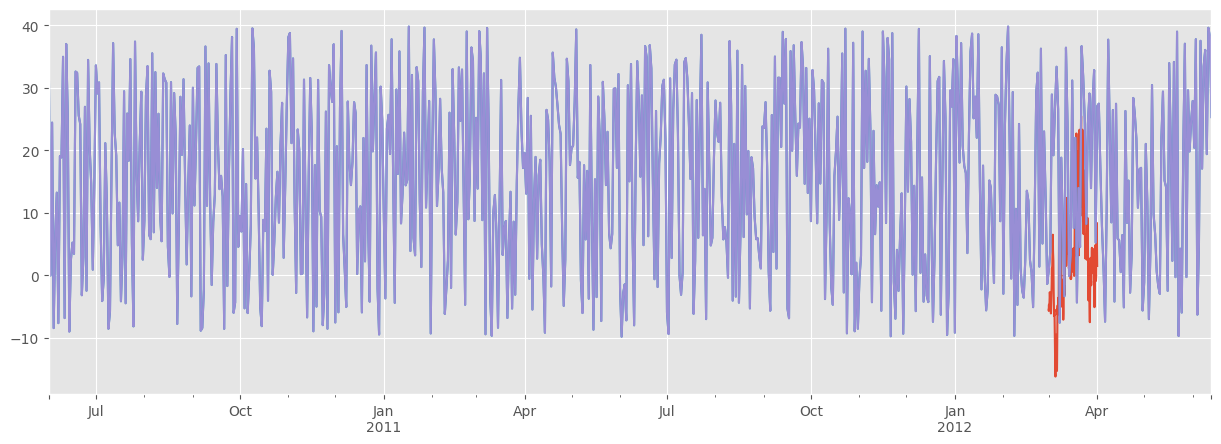

In [25]:
weather_mar2012[u"Temp (°C)"].plot(figsize=(15, 5))

In [26]:
asset.mock

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time (LST),Temp (°C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
2010-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.006468,NaN,...,NaN,36.767367,NaN,73.822915,NaN,NaN,NaN,NaN,NaN,"Moderate Snow,Blowing Snow"
2010-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.029559,NaN,...,NaN,26.470054,NaN,95.112604,NaN,NaN,NaN,NaN,NaN,"Snow,Ice Pellets"
2010-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.433323,NaN,...,NaN,11.292350,NaN,72.188617,NaN,NaN,NaN,NaN,NaN,"Freezing Drizzle,Haze"
2010-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.442150,NaN,...,NaN,30.377129,NaN,72.505070,NaN,NaN,NaN,NaN,NaN,"Thunderstorms,Heavy Rain Showers"
2010-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.235777,NaN,...,NaN,4.615873,NaN,93.213281,NaN,NaN,NaN,NaN,NaN,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-06-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.064813,NaN,...,NaN,9.952335,NaN,84.889414,NaN,NaN,NaN,NaN,NaN,"Rain Showers,Fog"
2012-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.391321,NaN,...,NaN,12.618441,NaN,68.099718,NaN,NaN,NaN,NaN,NaN,"Snow,Haze"
2012-06-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.606456,NaN,...,NaN,32.434483,NaN,90.864558,NaN,NaN,NaN,NaN,NaN,Snow Showers
2012-06-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.244383,NaN,...,NaN,26.520827,NaN,52.488381,NaN,NaN,NaN,NaN,NaN,"Drizzle,Snow,Fog"


In [27]:
# weather_mar2012.columns = [
#     u'Year', u'Month', u'Day', u'Time', u'Data Quality', u'Temp (C)', 
#     u'Temp Flag', u'Dew Point Temp (C)', u'Dew Point Temp Flag', 
#     u'Rel Hum (%)', u'Rel Hum Flag', u'Wind Dir (10s deg)', u'Wind Dir Flag', 
#     u'Wind Spd (km/h)', u'Wind Spd Flag', u'Visibility (km)', u'Visibility Flag',
#     u'Stn Press (kPa)', u'Stn Press Flag', u'Hmdx', u'Hmdx Flag', u'Wind Chill', 
#     u'Wind Chill Flag', u'Weather']

In [28]:
# weather[u"Temp (C)"].plot(figsize=(15, 5))

You'll notice in the summary above that there are a few columns which are are either entirely empty or only have a few values in them. Let's get rid of all of those with dropna.

The argument axis=1 to dropna means "drop columns", not rows", and how='any' means "drop the column if any value is null".

This is much better now -- we only have columns with real data.

In [29]:
weather_mar2012 = weather_mar2012.dropna(axis=1, how='any')
weather_mar2012[:5]

,Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
2010-06-01,31.006468,55,9,36.767367,73.822915,"Moderate Snow,Blowing Snow"
2010-06-02,-0.029559,56,28,26.470054,95.112604,"Snow,Ice Pellets"
2010-06-03,24.433323,87,26,11.292350,72.188617,"Freezing Drizzle,Haze"
2010-06-04,-8.442150,85,16,30.377129,72.505070,"Thunderstorms,Heavy Rain Showers"
2010-06-05,6.235777,63,8,4.615873,93.213281,Clear


The Year/Month/Day/Time columns are redundant, though, and the Data Quality column doesn't look too useful. Let's get rid of those.

The axis=1 argument means "Drop columns", like before. The default for operations like dropna and drop is always to operate on rows.

In [30]:
# weather_mar2012 = weather_mar2012.drop(['Year', 'Month', 'Day', 'Time', 'Data Quality'], axis=1)
# weather_mar2012[:5]

Awesome! We now only have the relevant columns, and it's much more manageable.



## Plotting the temperature by hour of day

This one's just for fun -- we've already done this before, using groupby and aggregate! We will learn whether or not it gets colder at night. Well, obviously. But let's do it anyway.

```python
Pointer
```
<AxesSubplot: xlabel='Hour'>

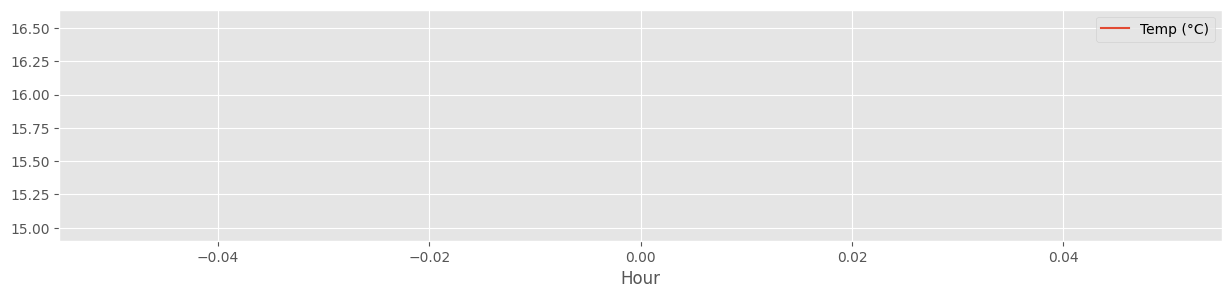

In [31]:
temperatures = weather_mar2012[[u'Temp (°C)']].copy()
temperatures.loc[:,'Hour'] = weather_mar2012.index.hour
# temperatures['Hour'] = weather_mar2012.index.hour
temperatures.groupby('Hour').aggregate(np.median).plot()


So it looks like the time with the highest median temperature is 2pm. Neat.

## Getting the whole year of data


Okay, so what if we want the data for the whole year? Ideally the API would just let us download that, but I couldn't figure out a way to do that.

First, let's put our work from above into a function that gets the weather for a given month.

I noticed that there's an irritating bug where when I ask for January, it gives me data for the previous year, so we'll fix that too. [no, really. You can check =)]

In [32]:
def download_weather_month(year=2012, month=1):
    url = url_template.format(year=year, month=month)
    asset = ds.assets[url]
    weather_data = asset.mock
    weather_data = weather_data.dropna(axis=1)
    return weather_data

We can test that this function does the right thing:



In [33]:
download_weather_month(2012, 1)[:5]

,Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
2010-06-01,33.555920,99,23,2.995365,65.775046,"Rain,Snow,Fog"
2010-06-02,27.935744,96,12,11.854758,92.004409,"Thunderstorms,Moderate Rain Showers,Fog"
2010-06-03,-2.353651,77,5,35.527103,65.645502,"Snow Showers,Fog"
2010-06-04,20.277773,98,18,28.827457,95.382538,"Freezing Rain,Haze"
2010-06-05,33.395293,76,28,38.527678,85.705499,"Thunderstorms,Heavy Rain Showers"


Now we can get all the months at once. This will take a little while to run.



In [34]:
data_by_month = [download_weather_month(2012, i) for i in range(1, 13)]

Once we have this, it's easy to concatenate all the dataframes together into one big dataframe using pd.concat. And now we have the whole year's data!

In [35]:
data_by_month[0]

,Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
2010-06-01,33.555920,99,23,2.995365,65.775046,"Rain,Snow,Fog"
2010-06-02,27.935744,96,12,11.854758,92.004409,"Thunderstorms,Moderate Rain Showers,Fog"
2010-06-03,-2.353651,77,5,35.527103,65.645502,"Snow Showers,Fog"
2010-06-04,20.277773,98,18,28.827457,95.382538,"Freezing Rain,Haze"
2010-06-05,33.395293,76,28,38.527678,85.705499,"Thunderstorms,Heavy Rain Showers"
...,...,...,...,...,...,...
2012-06-09,17.773543,98,12,21.340320,71.544580,"Rain,Snow,Ice Pellets"
2012-06-10,12.179285,62,24,39.577631,78.377324,Thunderstorms
2012-06-11,-2.437439,79,5,30.668549,98.780245,Snow
2012-06-12,39.559582,93,11,22.714382,78.176847,"Drizzle,Snow,Fog"


In [36]:
guest_client.api.lib.pandas.concat

<function syft.client.api.generate_remote_lib_function.<locals>.wrapper(*args, **kwargs)>

In [39]:
data_by_month

,type,id
0,TwinPointer(Mock):\n Temp (°C) Rel...,cff921f24e454353b54010393ab778b7
1,TwinPointer(Mock):\n Temp (°C) Rel...,516c89ad7b45469bb45721d58c807bdd
2,TwinPointer(Mock):\n Temp (°C) Rel...,d7683ebd77b543d4b59783751987637a
3,TwinPointer(Mock):\n Temp (°C) Rel...,ec1c7da964764229b5491f23700fdcb2
4,TwinPointer(Mock):\n Temp (°C) Rel...,258294c3c09a42b5ab593f12e6622e99


In [40]:
weather_2012 = guest_client.api.lib.pandas.concat(data_by_month)

what is this exception cannot concatenate object of type '<class 'syft.service.action.pandas.PandasDataFrameObject'>'; only Series and DataFrame objs are valid


In [41]:
weather_2012.request(guest_client)

AttributeError: 'str' object has no attribute 'request'

## Request real result

Lets requst the result

In [ ]:
weather_2012.request(guest_client)

# Data owner: approving the request

In [ ]:
domain_client = node.login(email="info@openmined.org", password="changethis")

root_domain_client.api.services.request[0].approve()

# Data scientist: fetch result

In [ ]:
guest_client = guest_domain_client.login(email="jane@caltech.edu", password="abc123")

real_result = result.get_from(guest_client)

real_result

It's slow and unnecessary to download the data every time, so let's save our dataframe for later use!

In [ ]:
# TODO do we use this later, if so lets change to import tempdir for windows
real_result.to_csv('/tmp/weather_2012.csv');

And we're done!

In [ ]:
node.land()